In [6]:
import pandas as pd
import numpy as np
from scipy import stats as sct
import seaborn as sns
from matplotlib import pyplot as plt
import os

In [7]:
df = pd.read_csv(os.path.join("dataset", "dataset_sp_limpo.csv"), index_col=0)
df = df[df.cs_sexo != "INDEFINIDO"]

## Test to verify if sexual gender influences COVID-19 mortality

H0: male mortality = female mortality

H1: male mortality ≠ female mortality

Alpha: 0.05

In [8]:
observed_frequency_death = df[df.obito == 1].cs_sexo.value_counts().values
observed_frequency_no_death = df[df.obito == 0].cs_sexo.value_counts().values

In [9]:
contingency_table = pd.DataFrame([observed_frequency_death, observed_frequency_no_death], 
                          index=["death", "no death"], columns=["male", "female"]).transpose()
contingency_table

,death,no death
male,20669,508373
female,15135,441954


In [16]:
sct.chi2_contingency(contingency_table)

(248.53149506065654,
 5.427385865812765e-56,
 1,
 array([[ 19208.21855108, 509833.78144892],
        [ 16595.78144892, 440493.21855108]]))

In [85]:
m, nm = df[df.cs_sexo == "MASCULINO"].obito.mean() * 100, (100-df[df.cs_sexo == "MASCULINO"].obito.mean() * 100)
f, nf = df[df.cs_sexo == "FEMININO"].obito.mean() * 100, (100-df[df.cs_sexo == "MASCULINO"].obito.mean() * 100)

In [87]:
(m/nm) / (f/nf)

1.5453723664069623

In [80]:
stat, p_value, dof, expected = sct.chi2_contingency(contingency_table)
if p_value > 0.05:
    print("HO not reject")
else:
    print("H0 reject")

H0 reject


In [26]:
print("Male ratio death: {}".format(df[df.cs_sexo == "MASCULINO"].obito.mean()))
print("Female ratio death: {}".format(df[df.cs_sexo == "FEMININO"].obito.mean()))

Male ratio death: 0.04467784783722383
Female ratio death: 0.028910732978292594


Based on the conclusions that:
- The difference in mortality between men and women is significant
- Male mortality is higher than female mortality

We can come to another conclusion that men are more likely to die from COVID-19 than women in this dataset

## Estimate ratio mortality in population using TCL

In [67]:
male_mortality_list = []
female_mortality_list = []
for _ in range(10000):
    sample = df.sample(2000)
    male_mortality = sample[sample.cs_sexo == "MASCULINO"].obito.mean()
    female_mortality = sample[sample.cs_sexo == "FEMININO"].obito.mean()
    male_mortality_list.append(male_mortality)
    female_mortality_list.append(female_mortality)


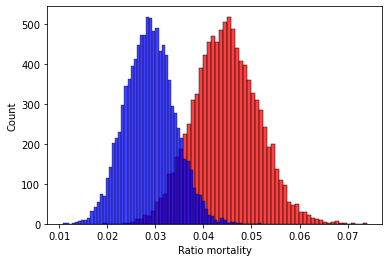

In [68]:
sns.histplot(male_mortality_list, color="r")
sns.histplot(female_mortality_list, color="b")
plt.xlabel("Ratio mortality");

In [74]:
np.mean(male_mortality_list)

0.04471725607216711

In [72]:
np.std(male_mortality_list)

0.006707812378555036

In [62]:
stat, p = sct.shapiro(male_mortality_list)
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Sample does not look Gaussian (reject H0)


In [61]:
stat, p = sct.shapiro(female_mortality_list)
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Sample does not look Gaussian (reject H0)


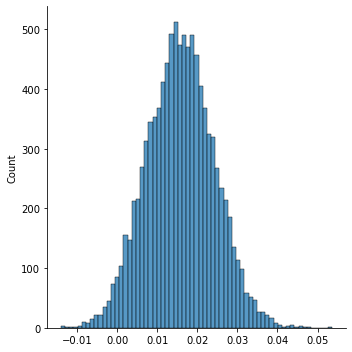

In [69]:
sns.displot(np.array(male_mortality_list) - np.array(female_mortality_list))